In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict
from pymatgen.ext.matproj import MPRester

# Initialize the MP Rester
mpr = MPRester('dRwW2Zuynv3Sklsf')

In [2]:

fefos_preds = pd.read_csv("fefos_predictions.csv")
mpid_in_fig2b = list(fefos_preds.loc[fefos_preds.coordination_match==1, "mp-id"].values)
mpid_not_in_fig2b = list(fefos_preds.loc[fefos_preds.coordination_match==0, "mp-id"].values)
all_mpids = list(fefos_preds["mp-id"].values)

In [3]:
batch_query_res = mpr.query(criteria={"task_id":{"$in":all_mpids}}, properties=["spacegroup", "task_id"], chunk_size=len(all_mpids))


In [4]:
binary_pair = pickle.load(open("../data_gather/binary_pairing_data.p", "rb"))
mpid2ox = {}
for key, data in binary_pair.items():
    if len(data)>0:
        for conc in data.keys():
            mpid2ox[data[conc]["MP_id"]] = int(key[-1])

ox2good_spgs = defaultdict(list)
ox2bad_spgs = defaultdict(list)
spgs2mpid = defaultdict(list)
for idx, result in enumerate(batch_query_res):
    mpid = result["task_id"]
    spg = result["spacegroup"]["number"]
    spgs2mpid[spg].append(mpid)
    if mpid in mpid_in_fig2b:
        ox2good_spgs[mpid2ox[mpid]].append(spg)
    else:
        ox2bad_spgs[mpid2ox[mpid]].append(spg)


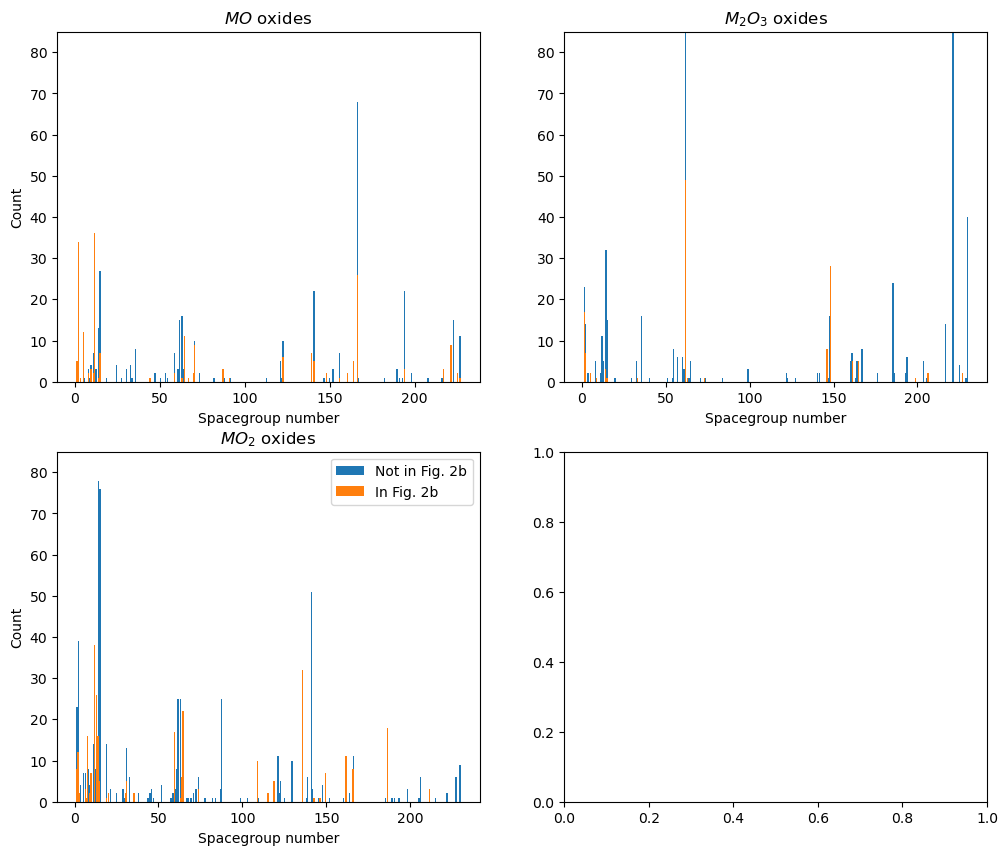

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0][0].hist(ox2bad_spgs[2], bins=300)
ax[0][0].hist(ox2good_spgs[2], bins=300)
ax[0][0].set_xlabel("Spacegroup number")
ax[0][0].set_ylabel("Count")
ax[0][0].set_title("$MO$ oxides")
ax[0][0].set_ylim(0, 85)

ax[0][1].hist(ox2bad_spgs[3], bins=300)
ax[0][1].hist(ox2good_spgs[3], bins=300)
ax[0][1].set_xlabel("Spacegroup number")
ax[0][1].set_title("$M_{2}O_{3}$ oxides")
ax[0][1].set_ylim(0, 85)

ax[1][0].hist(ox2bad_spgs[4], bins=300, label="Not in Fig. 2b")
ax[1][0].hist(ox2good_spgs[4], bins=300, label="In Fig. 2b")
ax[1][0].set_xlabel("Spacegroup number")
ax[1][0].set_title("$MO_{2}$ oxides")
ax[1][0].set_ylim(0, 85)
ax[1][0].set_ylabel("Count")

ax[1][0].legend()
plt.savefig("oxide_hists.pdf")